In [5]:
# Prelude
import ralphlib
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Easy
*2E1*. Probability of rain on monday ~ (2) Pr(rain|Monday) and (4) Pr(rain,Monday)/Pr(Monday), since $Pr(A,B)/Pr(B) = Pr(A|B)$

*2E2*. Pr(Monday|rain) ~ (3) probability that it's Monday, given that it is raining.

*2E3*. Probability it's Monday given that it's raining ~ (1) Pr(Monday|rain) and (4) Pr(rain|Monday)Pr(Monday)/Pr(rain) = Pr(Monday|rain), since

$$
\begin{align}
    \frac{Pr(A|B)Pr(B)}{Pr(A)} &= \frac{Pr(A,B)}{Pr(A)} \\
        &= Pr(B|A)
\end{align}
$$

*2E4*. Some ways to articulate "the probability of water is 0.7" in the globe experiment:
- In the **small world of the model**, that is, taking on the assumptions of the experiment, a 0.7 ratio of water to land gives the highest proportion of ways that allow the sampled data to come up
- I bet that the ratio is 0.7 (i.e. my current belief given the evidence given by the samples)

# Medium
*2M1*.

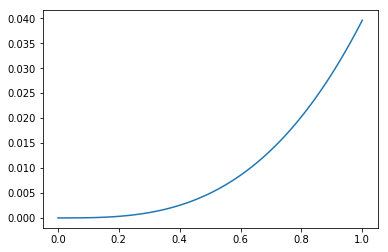

In [11]:
grid = np.linspace(start=0, stop=1, num=100)

def world_toss_likelihood(num_water, num_tries):
    return lambda grid: stats.binom.pmf(num_water, num_tries, grid)

# 1
posterior_1 = ralphlib.grid_approx(
    ralphlib.uniform_prior,
    world_toss_likelihood(3, 3),
    grid
)
plt.plot(grid, posterior_1)

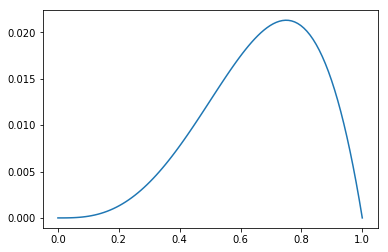

In [12]:
posterior_2 = ralphlib.grid_approx(
    ralphlib.uniform_prior,
    world_toss_likelihood(3, 4),
    grid
)
plt.plot(grid, posterior_2)

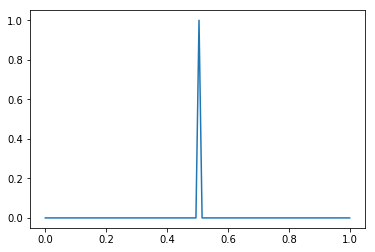

In [13]:
posterior_3 = ralphlib.grid_approx(
    ralphlib.uniform_prior,
    world_toss_likelihood(5020000, 10000000),
    grid
)
plt.plot(grid, posterior_3)

In [14]:
max(posterior_3)

1.0

*2M2.*

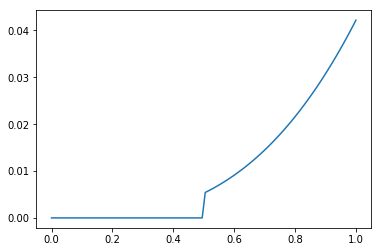

In [31]:
def prob2M2(num_water, num_tries):
    def likelihood(grid):
        return np.concatenate((
            np.repeat(0, len(grid[grid <= 0.5])),
            ralphlib.uniform_prior(grid[grid > 0.5])
        ))
    
    grid = np.linspace(start=0, stop=1.0, num=100)
    posterior = ralphlib.grid_approx(
        likelihood,
        world_toss_likelihood(num_water, num_tries),
        grid
    )
    plt.plot(grid, posterior)
    
prob2M2(3, 3)

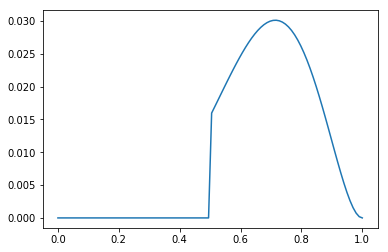

In [44]:
prob2M2(5, 7)

*2M3*.

$$
\begin{align}
    P(earth|L)P(L) &= P(L|earth)P(earth) \\
    P(earth|L) &= \frac{P(L|earth)P(earth)}{P(L)} \\
        &= \frac{P(L|earth)P(earth)}{P(L, earth) + P(L, mars)} \\
        &= \frac{P(L|earth)P(earth)}{P(L|earth)P(earth) + P(L|mars)P(mars)} \\
        &= \frac{0.3 * 0.5}{0.3 * 0.5 + 1.0 * 0.5} \\
        &= 0.23
\end{align}
$$